#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Καζδαγλη Αριάδνη 03118838       
Σωτήρου Θεόδωρος 03118209


##1. Θεωρητικό μέρος

Στον παρακάτω πίνακα παρουσιάζονται τα επίπεδα, το μέγεθος των φίλτρων,η συνάρτηση ενεργοποίησης, το πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα.



| Δίκτυο | Επίπεδα | Μέγεθος Φίτροων | Συνάρτηση ενεργοποίησης| Παράμετροι| Pooling| Dropout|
|:--------:|:---------:|:-----------------:|:----------------------:|:-----------:|:------:|:--------:|
|   Handwritten Digit Recognition (LeNet)  |2 feature extractors <br> 2 averaging/subsampling <br> 1 output|   -   |Sigmoid|2578|-|-|
|   ImageNet Classification  (AlexNet) |5 convolutional <br> 3 Fully Connected|Differs per layer |Relu |60 mil|Max Pooling (Μερικά επίπεδα)| Ναι (Πρώτα δύο επίπεδα)|
|Very Deep CN (VGGNet)|Stack of convolutional <br> 3 Fully Connected|3x3 |Relu|133-144 mil (depending on <br> configuration)|Max Pooling (Μερικά επίπεδα)| Ναι (Πρώτα δύο επίπεδα) |

Στην συνέχεια παρουσιάζουμε τις βασικές διαφορές στην αρχιτεκτονική και την απόδοση μεταξύ των τριών δικτύων.


1.   LeNet

  *   Αρχιτεκτονική: Είναι ένα σχετικά απλό συνελικτικό νευρωνικό δίκτυο (CNN) που αποτελείται από δύο συνελικτικά επίπεδα που ακολουθούνται από δύο πλήρως συνδεδεμένα επίπεδα.
  *   Απόδοση: Σχεδιάστηκε κυρίως για την αναγνώριση χειρόγραφων ψηφίων και επιτυγχάνει εξαιρετική απόδοση στο σύνολο δεδομένων MNIST. Ωστόσο, ενδέχεται να μην είναι τόσο αποτελεσματικό σε πιο πολύπλοκες και μεγαλύτερης κλίμακας εργασίες αναγνώρισης εικόνας.

2.   AlexNet

  *   Αρχιτεκτονική: Είναι ένα βαθύτερο CNN με πέντε συνελικτικά επίπεδα που ακολουθούνται από τρία πλήρως συνδεδεμένα επίπεδα. Χρησιμοποιεί την συνάρτηση ενεργοποίησης ReLU και περιλαμβάνει τεχνικές όπως το overlapping pooling και το dropout.
  *   Απόδοση: Βελτίωσε σημαντικά την απόδοση ταξινόμησης εικόνων στο σύνολο δεδομένων ImageNet και κέρδισε το ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) 2012.
  
3.  VGGNet

  *   Αρχιτεκτονική: Περιέχει απο 11 έως 19 συνελικτικά επίπεδα που χρησιμοποιούν φίλτρα 3x3. Περιλαμβάνει εναλλαγές μεταξύ συνελικτικών και επιπέδων υποδειγματοληψίας (pooling) και ακολουθείται από τρία πλήρως συνδεδεμένα επίπεδα.
  *   Απόδοση: Επιδεικνύει εξαιρετική απόδοση στην αναγνώριση εικόνας στο σύνολο δεδομένων ImageNet. Η βαθύτερη αρχιτεκτονική και η χρήση μικρότερων φίλτρων έχουν ως αποτέλεσμα ακρίβεια και αναπαραγωγιμότητα, καθιστώντας το ιδανικό για αναγνώριση εικόνας σε μεγάλη κλίμακα.
  



## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [3]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 25

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [8]:
# print our classes
print(our_classes)

[' aquarium_fish', ' baby', ' bee', ' bicycle', ' bottle', ' camel', ' cup', ' elephant', ' lamp', ' lion', ' man', ' maple_tree', ' orange', ' pear', ' rabbit', ' rose', ' sunflower', ' telephone', ' train', ' wolf']


In [9]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


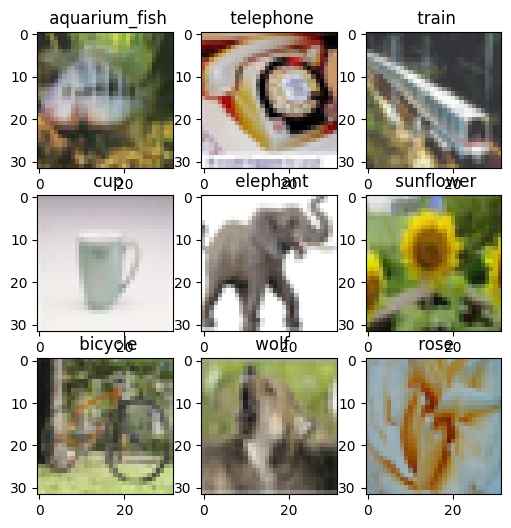

In [10]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [11]:
values = np.unique(y_val)
values = np.sort(values)

y_val_to20 = np.zeros(len(y_val), dtype=int)
for i in range (y_val.shape[0]):
  y_val_to20[i] =  np.where(values == y_val[i])[0][0]

y_train_to20 = np.zeros(len(y_train), dtype=int)
for i in range (y_train.shape[0]):
  y_train_to20[i] =  np.where(values == y_train[i])[0][0]

y_test_to20 = np.zeros(len(y_test), dtype=int)
for i in range (y_test.shape[0]):
  y_test_to20[i] =  np.where(values == y_test[i])[0][0]

# Ερώτημα 1
---



## Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα - accuracy (όπως στο Lab5).


### LeNet

In [17]:
def LeNet(optimizer,loss):
  LeNet = models.Sequential()
  LeNet.add(layers.Conv2D(filters=6, kernel_size=5,activation='sigmoid', padding='same', input_shape=(32, 32, 3))) 
  LeNet.add(layers.AvgPool2D(pool_size=2, strides=2))
  LeNet.add(layers.Conv2D(filters=16, kernel_size=5,activation='sigmoid'))
  LeNet.add(layers.AvgPool2D(pool_size=2, strides=2))
  LeNet.add(layers.Flatten())
  LeNet.add(layers.Dense(120, activation='sigmoid'))
  LeNet.add(layers.Dense(84, activation='sigmoid'))
  LeNet.add(layers.Dense(20))
  LeNet.compile(optimizer=optimizer, loss= loss, metrics=["accuracy"])
  return LeNet

In [18]:
LeNet1 = LeNet('adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_LeNet1 = LeNet1.fit(x_train, y_train_to20, epochs=20, batch_size=20,validation_data=(x_val, y_val_to20))

Epoch 1/20
425/425 [==============================] - 5s 5ms/step - loss: 3.0095 - accuracy: 0.0541 - val_loss: 2.9590 - val_accuracy: 0.0653
Epoch 2/20
425/425 [==============================] - 2s 4ms/step - loss: 2.8054 - accuracy: 0.1085 - val_loss: 2.7017 - val_accuracy: 0.1427
Epoch 3/20
425/425 [==============================] - 2s 4ms/step - loss: 2.6659 - accuracy: 0.1614 - val_loss: 2.5998 - val_accuracy: 0.1700
Epoch 4/20
425/425 [==============================] - 2s 4ms/step - loss: 2.5582 - accuracy: 0.1994 - val_loss: 2.4899 - val_accuracy: 0.2113
Epoch 5/20
425/425 [==============================] - 2s 4ms/step - loss: 2.4791 - accuracy: 0.2288 - val_loss: 2.4151 - val_accuracy: 0.2487
Epoch 6/20
425/425 [==============================] - 2s 4ms/step - loss: 2.4050 - accuracy: 0.2515 - val_loss: 2.3698 - val_accuracy: 0.2527
Epoch 7/20
425/425 [==============================] - 2s 5ms/step - loss: 2.3048 - accuracy: 0.2922 - val_loss: 2.2599 - val_accuracy: 0.3153
Epoch 

In [ ]:
LeNet2 = LeNet('rmsprop',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_LeNet2 = LeNet2.fit(x_train, y_train_to20, epochs=30, batch_size=32,validation_data=(x_val, y_val_to20))

Epoch 1/30
266/266 [==============================] - 3s 5ms/step - loss: 3.0136 - accuracy: 0.0522 - val_loss: 3.0102 - val_accuracy: 0.0460
Epoch 2/30
266/266 [==============================] - 1s 4ms/step - loss: 3.0072 - accuracy: 0.0509 - val_loss: 3.0113 - val_accuracy: 0.0487
Epoch 3/30
266/266 [==============================] - 1s 4ms/step - loss: 2.9647 - accuracy: 0.0705 - val_loss: 2.8553 - val_accuracy: 0.1200
Epoch 4/30
266/266 [==============================] - 1s 4ms/step - loss: 2.7518 - accuracy: 0.1298 - val_loss: 2.6671 - val_accuracy: 0.1433
Epoch 5/30
266/266 [==============================] - 1s 4ms/step - loss: 2.6358 - accuracy: 0.1704 - val_loss: 2.5773 - val_accuracy: 0.1767
Epoch 6/30
266/266 [==============================] - 1s 5ms/step - loss: 2.5843 - accuracy: 0.1811 - val_loss: 2.5319 - val_accuracy: 0.2053
Epoch 7/30
266/266 [==============================] - 2s 6ms/step - loss: 2.5433 - accuracy: 0.1987 - val_loss: 2.4957 - val_accuracy: 0.2033
Epoch 

### AlexNet

In [19]:
def AlexNet(optimizer,loss):
  AlexNet = models.Sequential()
  AlexNet.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(32, 32, 3)))
  AlexNet.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'))
  AlexNet.add(layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  AlexNet.add(layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'))
  AlexNet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'))
  AlexNet.add(layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
  AlexNet.add(layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(layers.Flatten())
  AlexNet.add(layers.Dense(4096, activation='relu'))
  AlexNet.add(layers.Dropout(0.5))
  AlexNet.add(layers.Dense(4096, activation='relu'))
  AlexNet.add(layers.Dropout(0.5))
  AlexNet.add(layers.Dense(20))
  AlexNet.compile(optimizer=optimizer, loss= loss, metrics=['accuracy'])
  return AlexNet

In [ ]:
AlexNet1 = AlexNet('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
historty_AlexNet1 = AlexNet1.fit(x_train, y_train_to20,  epochs=13, batch_size=128, validation_data=(x_val, y_val_to20))

Epoch 1/13
67/67 [==============================] - 16s 128ms/step - loss: 3.0549 - accuracy: 0.0613 - val_loss: 2.8764 - val_accuracy: 0.1080
Epoch 2/13
67/67 [==============================] - 6s 94ms/step - loss: 2.7128 - accuracy: 0.1634 - val_loss: 2.4571 - val_accuracy: 0.2200
Epoch 3/13
67/67 [==============================] - 6s 95ms/step - loss: 2.4091 - accuracy: 0.2415 - val_loss: 2.2974 - val_accuracy: 0.2687
Epoch 4/13
67/67 [==============================] - 6s 96ms/step - loss: 2.2601 - accuracy: 0.2911 - val_loss: 2.1710 - val_accuracy: 0.3260
Epoch 5/13
67/67 [==============================] - 6s 96ms/step - loss: 2.1066 - accuracy: 0.3535 - val_loss: 2.0761 - val_accuracy: 0.3560
Epoch 6/13
67/67 [==============================] - 6s 94ms/step - loss: 2.0015 - accuracy: 0.3822 - val_loss: 2.0020 - val_accuracy: 0.3873
Epoch 7/13
67/67 [==============================] - 6s 96ms/step - loss: 1.8908 - accuracy: 0.4115 - val_loss: 1.9184 - val_accuracy: 0.3933
Epoch 8/13


In [20]:
AlexNet2 = AlexNet('sgd', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
historty_AlexNet2 = AlexNet2.fit(x_train, y_train_to20,  epochs=25, batch_size=64, validation_data=(x_val, y_val_to20))

Epoch 1/25
133/133 [==============================] - 13s 73ms/step - loss: 2.9933 - accuracy: 0.0527 - val_loss: 2.9873 - val_accuracy: 0.0467
Epoch 2/25
133/133 [==============================] - 8s 58ms/step - loss: 2.9690 - accuracy: 0.0752 - val_loss: 2.8727 - val_accuracy: 0.0880
Epoch 3/25
133/133 [==============================] - 8s 58ms/step - loss: 2.7947 - accuracy: 0.1174 - val_loss: 2.6473 - val_accuracy: 0.1807
Epoch 4/25
133/133 [==============================] - 8s 62ms/step - loss: 2.6837 - accuracy: 0.1508 - val_loss: 2.5700 - val_accuracy: 0.2300
Epoch 5/25
133/133 [==============================] - 7s 56ms/step - loss: 2.5882 - accuracy: 0.1839 - val_loss: 2.4715 - val_accuracy: 0.2300
Epoch 6/25
133/133 [==============================] - 8s 58ms/step - loss: 2.4954 - accuracy: 0.2187 - val_loss: 2.4469 - val_accuracy: 0.2607
Epoch 7/25
133/133 [==============================] - 8s 57ms/step - loss: 2.4216 - accuracy: 0.2444 - val_loss: 2.3409 - val_accuracy: 0.274

### VGG

In [12]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size=3,padding='same', activation='relu'))
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk
        
def VGG(arch,optimizer,loss):
  vgg = models.Sequential()
  vgg.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(32, 32, 3)))
  vgg.add(layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  vgg.add(tf.keras.layers.BatchNormalization(momentum=0.8))
  vgg.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  for (num_convs, num_channels) in arch:
    vgg.add(vgg_block(num_convs, num_channels))
  vgg.add(tf.keras.layers.Flatten())
  vgg.add(tf.keras.layers.Dense(4096, activation='relu'))
  vgg.add(tf.keras.layers.Dropout(0.5))
  vgg.add(tf.keras.layers.Dense(4096, activation='relu'))
  vgg.add(tf.keras.layers.Dropout(0.5))
  vgg.add(tf.keras.layers.Dense(20))
  vgg.compile(optimizer=optimizer,loss=loss, metrics=['accuracy'])
  return vgg

In [ ]:
vgg1 = VGG(((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)),'adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_vgg1 = vgg1.fit(x_train, y_train_to20, epochs=20, batch_size=128,validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 56s 573ms/step - loss: 3.0183 - accuracy: 0.0686 - val_loss: 2.7380 - val_accuracy: 0.1060
Epoch 2/20
67/67 [==============================] - 29s 439ms/step - loss: 2.6846 - accuracy: 0.1235 - val_loss: 2.6042 - val_accuracy: 0.1613
Epoch 3/20
67/67 [==============================] - 29s 439ms/step - loss: 2.5450 - accuracy: 0.1844 - val_loss: 2.4009 - val_accuracy: 0.2280
Epoch 4/20
67/67 [==============================] - 31s 459ms/step - loss: 2.3324 - accuracy: 0.2668 - val_loss: 2.2445 - val_accuracy: 0.2907
Epoch 5/20
67/67 [==============================] - 31s 457ms/step - loss: 2.1657 - accuracy: 0.3256 - val_loss: 2.1016 - val_accuracy: 0.3453
Epoch 6/20
67/67 [==============================] - 31s 456ms/step - loss: 2.0086 - accuracy: 0.3773 - val_loss: 1.9793 - val_accuracy: 0.3787
Epoch 7/20
67/67 [==============================] - 31s 457ms/step - loss: 1.8885 - accuracy: 0.4148 - val_loss: 1.9357 - val_accuracy: 0.4147

In [13]:
vgg2 = VGG(((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)),'rmsprop',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_vgg2 = vgg2.fit(x_train, y_train_to20, epochs=40, batch_size=64,validation_data=(x_val, y_val_to20))

Epoch 1/40
133/133 [==============================] - 47s 273ms/step - loss: 3.0299 - accuracy: 0.0504 - val_loss: 2.9987 - val_accuracy: 0.0367
Epoch 2/40
133/133 [==============================] - 31s 233ms/step - loss: 2.9976 - accuracy: 0.0465 - val_loss: 3.0021 - val_accuracy: 0.0427
Epoch 3/40
133/133 [==============================] - 33s 246ms/step - loss: 2.9636 - accuracy: 0.0696 - val_loss: 2.7994 - val_accuracy: 0.0907
Epoch 4/40
133/133 [==============================] - 32s 242ms/step - loss: 2.7732 - accuracy: 0.1108 - val_loss: 2.7362 - val_accuracy: 0.1420
Epoch 5/40
133/133 [==============================] - 31s 232ms/step - loss: 2.6398 - accuracy: 0.1531 - val_loss: 2.5718 - val_accuracy: 0.1720
Epoch 6/40
133/133 [==============================] - 31s 232ms/step - loss: 2.4774 - accuracy: 0.2265 - val_loss: 2.2945 - val_accuracy: 0.2927
Epoch 7/40
133/133 [==============================] - 31s 233ms/step - loss: 2.2851 - accuracy: 0.2992 - val_loss: 2.1369 - val_ac

### MyCNN

---

In [15]:
def MyCNN(optimizer,loss):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(20))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [ ]:
MyCNN1 = MyCNN('adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN1 = MyCNN1.fit(x_train, y_train_to20, epochs=10, batch_size=64,validation_data=(x_val, y_val_to20))

Epoch 1/10
133/133 [==============================] - 3s 9ms/step - loss: 2.6449 - accuracy: 0.1736 - val_loss: 2.3237 - val_accuracy: 0.2753
Epoch 2/10
133/133 [==============================] - 1s 5ms/step - loss: 2.1721 - accuracy: 0.3406 - val_loss: 2.0880 - val_accuracy: 0.3700
Epoch 3/10
133/133 [==============================] - 1s 5ms/step - loss: 1.9271 - accuracy: 0.4175 - val_loss: 1.9258 - val_accuracy: 0.4220
Epoch 4/10
133/133 [==============================] - 1s 5ms/step - loss: 1.7859 - accuracy: 0.4542 - val_loss: 1.7559 - val_accuracy: 0.4760
Epoch 5/10
133/133 [==============================] - 1s 5ms/step - loss: 1.6459 - accuracy: 0.4972 - val_loss: 1.6107 - val_accuracy: 0.5013
Epoch 6/10
133/133 [==============================] - 1s 6ms/step - loss: 1.5427 - accuracy: 0.5322 - val_loss: 1.5810 - val_accuracy: 0.5053
Epoch 7/10
133/133 [==============================] - 1s 7ms/step - loss: 1.4697 - accuracy: 0.5546 - val_loss: 1.5219 - val_accuracy: 0.5200
Epoch 

In [16]:
MyCNN2 = MyCNN('adam',tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN2 = MyCNN2.fit(x_train, y_train_to20, epochs=20,batch_size=None,validation_data=(x_val, y_val_to20))

Epoch 1/20
266/266 [==============================] - 4s 7ms/step - loss: 2.5844 - accuracy: 0.1989 - val_loss: 2.3218 - val_accuracy: 0.3227
Epoch 2/20
266/266 [==============================] - 1s 5ms/step - loss: 2.1441 - accuracy: 0.3489 - val_loss: 2.0093 - val_accuracy: 0.3960
Epoch 3/20
266/266 [==============================] - 1s 5ms/step - loss: 1.9393 - accuracy: 0.4178 - val_loss: 1.9678 - val_accuracy: 0.4227
Epoch 4/20
266/266 [==============================] - 2s 6ms/step - loss: 1.7972 - accuracy: 0.4562 - val_loss: 1.7584 - val_accuracy: 0.4700
Epoch 5/20
266/266 [==============================] - 1s 5ms/step - loss: 1.6655 - accuracy: 0.4884 - val_loss: 1.7208 - val_accuracy: 0.4807
Epoch 6/20
266/266 [==============================] - 1s 5ms/step - loss: 1.5468 - accuracy: 0.5284 - val_loss: 1.6233 - val_accuracy: 0.4880
Epoch 7/20
266/266 [==============================] - 1s 5ms/step - loss: 1.4546 - accuracy: 0.5548 - val_loss: 1.5795 - val_accuracy: 0.5147
Epoch 

## Βήμα 2: Αξιολόγηση των μοντέλων


1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).


In [21]:
def acc_plot(history,model):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(x_test,  y_test_to20, verbose=2)
  return test_loss, test_acc

### LeNet

63/63 - 0s - loss: 1.7968 - accuracy: 0.4495 - 348ms/epoch - 6ms/step


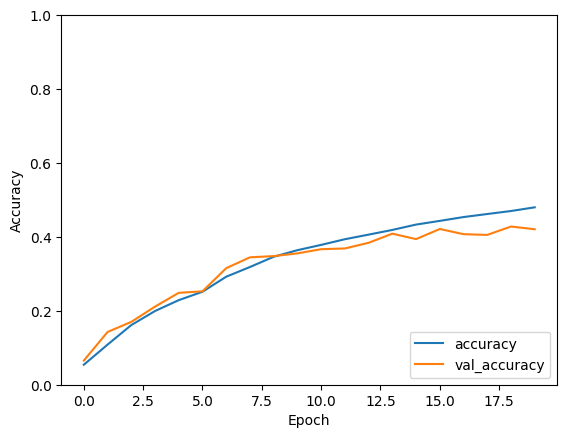

In [22]:
lenet_loss, lenet_acc = acc_plot(history_LeNet1, LeNet1)

### AlexNet

63/63 - 1s - loss: 1.8495 - accuracy: 0.4430 - 1s/epoch - 21ms/step


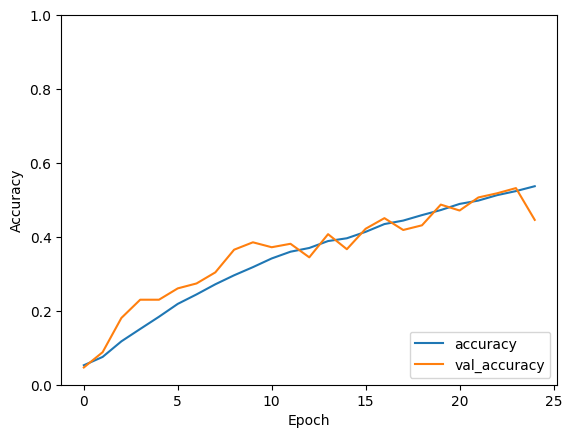

In [23]:
alexnet_loss, alexnet_acc = acc_plot(historty_AlexNet2,AlexNet2)

### VGG

63/63 - 4s - loss: 3.5640 - accuracy: 0.5855 - 4s/epoch - 59ms/step


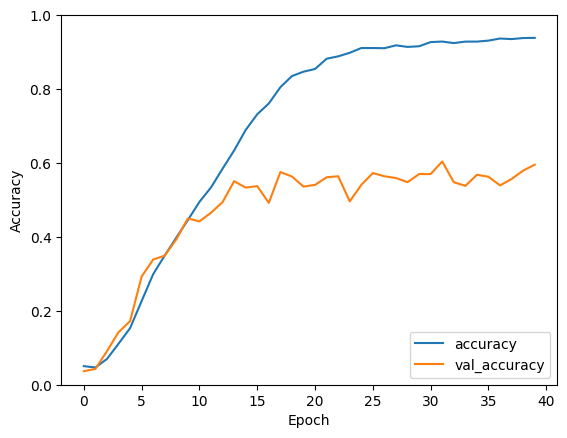

In [25]:
vgg_loss, vgg_acc = acc_plot(history_vgg2,vgg2)

### MyCNN

63/63 - 0s - loss: 1.7509 - accuracy: 0.5680 - 335ms/epoch - 5ms/step


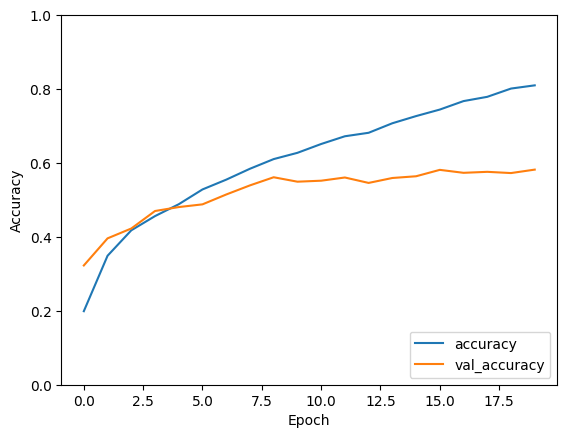

In [26]:
mycnn_loss, mycnn_acc = acc_plot(history_MyCNN2,MyCNN2)

2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.

Σχόλιο: Λόγω της απαίτησης σε μνήμη του πρώτης vgg υπολοίησης η οποία είναι και η καλύτερη, επιλέχθηκε να αναπαρασταθεί η δεύτερη υλοποίηση vgg.

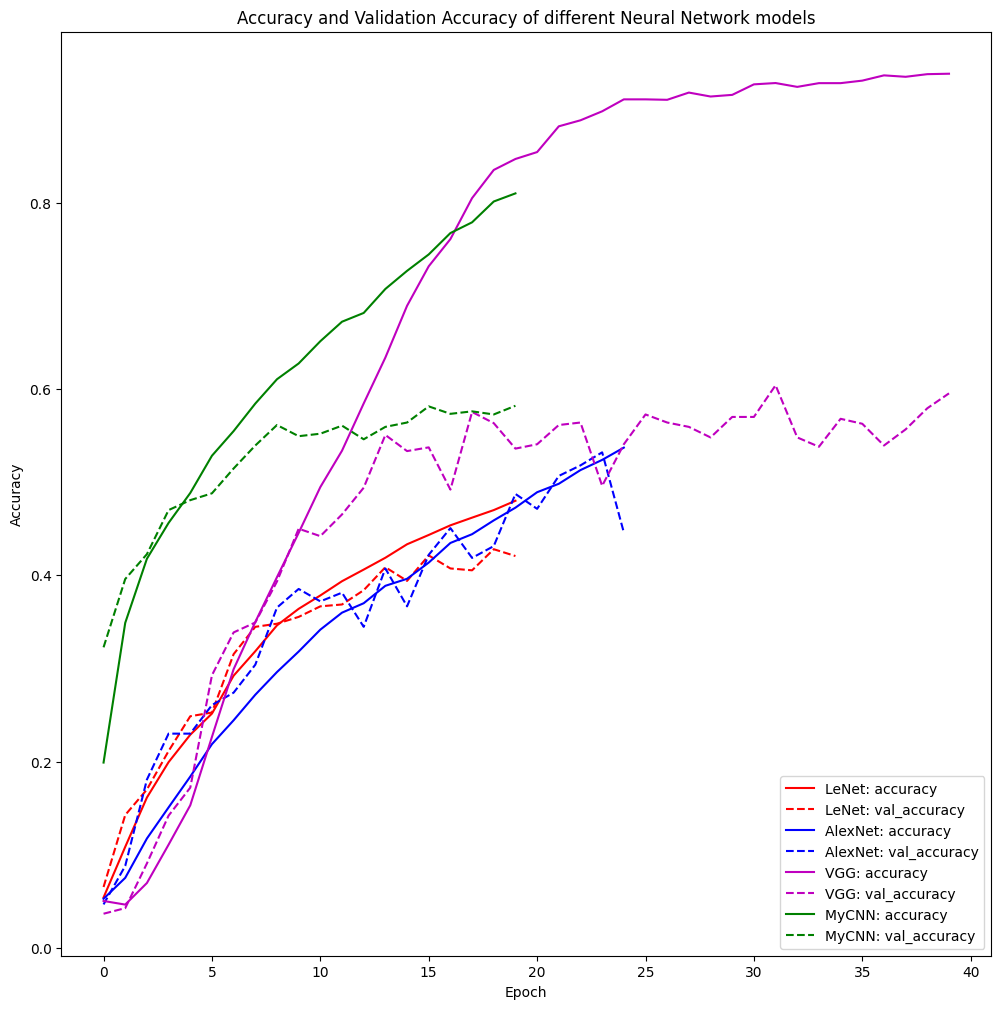

In [27]:
names = ['LeNet', 'AlexNet', 'VGG', 'MyCNN']
histories = [history_LeNet1, historty_AlexNet2, history_vgg2, history_MyCNN2]

fig = plt.figure(figsize=(12,12))
plt.title("Accuracy and Validation Accuracy of different Neural Network models")
i=0
color_arr = ['r','b','m','g','y']
for history in histories:
  plt.plot(history.history['accuracy'], label=names[i]+': accuracy', color=color_arr[i%5])
  plt.plot(history.history['val_accuracy'], linestyle='dashed', label = names[i] + ': val_accuracy',color=color_arr[i%5])
  i+=1

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 


- Ένα μεγαλύτερο σύνολο δεδομένων μπορεί να βελτιώσει την απόδοση του μοντέλου. Αν το μοντέλο έχει περιορισμένο σύνολο δεδομένων, μπορεί να προκύψουν προβλήματα όπως η υπερεκπαίδευση (overfitting) ή η αδυναμία γενίκευσης των μοντέλων. Όσο μεγαλύτερο είναι το πλήθος των κλάσεων τοσο πιο πολύπλοκο γίνεται το πρόβλημα κατηγοριποίησης.

- Ο αλγόριθμος βελτιστοποίσης επηρεάζει την εκπαίδευση του μοντέλου οσον αφορά την ταχύτητα σύγκλισης, την αποφυγή overfitting και η επιλογή κατάλληλου αλγορίθμου εξαρτάται απο τις παραμέτρους του προβλήματος. Μέσα απο δοκιμές παρατηρήσαμε πως ο adam optimizer σύγκλινε σχετικά γρήγορα σε ψηλές τιμές accuracy ενώ ο sgd χρειαζόταν περισσότερες εποχές για να συγκλίνει. Οι υπόλοιποι αλγόριθμοι που δοκιμάσαμε δεν πετύχαιναν τόσο καλές αποδόσεις.

- Μικρότερο μέγεθος δέσμης παρατηρήσαμε οτι οδηγούν γρηγορότερα σε σύγκλιση ενώ απαιτείται και λιγότερη μνήμη GPU.

---

## Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.

In [29]:
def evaluation(model, text):
  print("--------------------------------------")
  print("\033[1m" + text + "\033[0m")
  loss, acc = model.evaluate(x_test, y_test_to20)
  print("Accuracy: ", acc, " Loss: ", loss)
  return loss, acc

### LeNet

In [ ]:
l1_test_loss,l1_test_acc = evaluation(LeNet1,'LeNet1')
l2_test_loss,l2_test_acc = evaluation(LeNet2,'LeNet2')

--------------------------------------
LeNet1
63/63 [==============================] - 0s 3ms/step - loss: 1.8558 - accuracy: 0.4285
Accuracy:  0.4284999966621399  Loss:  1.855783462524414
--------------------------------------
LeNet2
63/63 [==============================] - 0s 3ms/step - loss: 1.8934 - accuracy: 0.4200
Accuracy:  0.41999998688697815  Loss:  1.8934108018875122


### AlexNet

In [ ]:
a1_test_loss,a1_test_acc = evaluation(AlexNet1,'AlexNet1')
a2_test_loss,a2_test_acc = evaluation(AlexNet2,'AlexNet2')

--------------------------------------
AlexNet1
63/63 [==============================] - 1s 15ms/step - loss: 1.7202 - accuracy: 0.4955
Accuracy:  0.49549999833106995  Loss:  1.7202101945877075
--------------------------------------
AlexNet2
63/63 [==============================] - 1s 11ms/step - loss: 1.5271 - accuracy: 0.5425
Accuracy:  0.5425000190734863  Loss:  1.5270506143569946


### VGG

In [30]:
v1_test_loss,v1_test_acc = evaluation(vgg1,'VGG1')
v2_test_loss,v2_test_acc = evaluation(vgg2,'VGG2')

--------------------------------------
VGG2
63/63 [==============================] - 2s 32ms/step - loss: 3.5640 - accuracy: 0.5855
Accuracy:  0.5855000019073486  Loss:  3.563971996307373


### MyCNN

In [ ]:
m1_test_loss,m1_test_acc = evaluation(MyCNN1,'MyCNN1')
m2_test_loss,m2_test_acc = evaluation(MyCNN2,'MyCNN2')

--------------------------------------
MyCNN1
63/63 [==============================] - 0s 4ms/step - loss: 1.4211 - accuracy: 0.5800
Accuracy:  0.5799999833106995  Loss:  1.4210623502731323
--------------------------------------
MyCNN2
63/63 [==============================] - 0s 3ms/step - loss: 2.1118 - accuracy: 0.5750
Accuracy:  0.574999988079071  Loss:  2.1118454933166504



---
---

# Ερώτημα 2
---

## Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

In [23]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

def MyCNN_optim(optimizer,loss):
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [24]:
MyCNN_opt = MyCNN_optim('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_opt = MyCNN_opt.fit(x_train, y_train_to20, epochs=60,batch_size=64,validation_data=(x_val, y_val_to20))

Epoch 1/60
133/133 [==============================] - 5s 10ms/step - loss: 2.7104 - accuracy: 0.1533 - val_loss: 2.4075 - val_accuracy: 0.2827
Epoch 2/60
133/133 [==============================] - 1s 6ms/step - loss: 2.4005 - accuracy: 0.2631 - val_loss: 2.1776 - val_accuracy: 0.3493
Epoch 3/60
133/133 [==============================] - 1s 7ms/step - loss: 2.2368 - accuracy: 0.3189 - val_loss: 2.0982 - val_accuracy: 0.3700
Epoch 4/60
133/133 [==============================] - 1s 6ms/step - loss: 2.1304 - accuracy: 0.3565 - val_loss: 1.9226 - val_accuracy: 0.4300
Epoch 5/60
133/133 [==============================] - 1s 6ms/step - loss: 2.0461 - accuracy: 0.3792 - val_loss: 1.8357 - val_accuracy: 0.4373
Epoch 6/60
133/133 [==============================] - 1s 6ms/step - loss: 1.9769 - accuracy: 0.4052 - val_loss: 1.7679 - val_accuracy: 0.4700
Epoch 7/60
133/133 [==============================] - 1s 7ms/step - loss: 1.9309 - accuracy: 0.4156 - val_loss: 1.6977 - val_accuracy: 0.4993
Epoch

---
## Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

Μετα απο μερικές δοκιμάς καταλήξαμε πως το καλύτερο μοντέλο περιέχει δυο Dropout Layers με 0.1 και 0.05 dropout αντίστοιχα. Χρησιμοποιήσαμε data augmentation ενω δοκιμές με Image Generation δεν βοήθησαν στην τελική αξιολόγηση του μοντέλου μας. Σημειώνεται οτι αυξήσαμε και τις εποχές εκπαίδευσης του μοντέλου μας ενώ αλλάξαμε και την τιμή του batch_size

In [25]:
def evaluation_val(model, text):
  print("--------------------------------------")
  print("\033[1m" + text + "\033[0m")
  loss, acc = model.evaluate(x_val, y_val_to20)
  print("Accuracy: ", acc, " Loss: ", loss)
  return loss, acc

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 0s 3ms/step - loss: 1.3502 - accuracy: 0.6170
Accuracy:  0.6169999837875366  Loss:  1.3502187728881836
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.6153
Accuracy:  0.6153333187103271  Loss:  1.3406230211257935
63/63 - 0s - loss: 1.3502 - accuracy: 0.6170 - 148ms/epoch - 2ms/step


(1.3502187728881836, 0.6169999837875366)

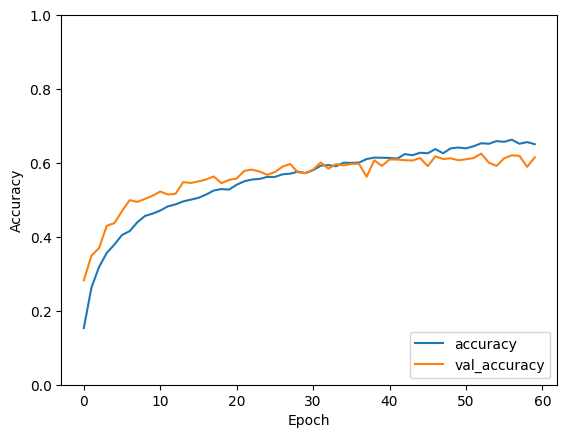

In [30]:
mycnn_opt_test_loss,mycnn_opt_test_acc = evaluation(MyCNN_opt,'MyCNN optimized test set')
mycnn_opt_val_loss,mycnn_opt_val_acc = evaluation_val(MyCNN_opt,'MyCNN optimized validation')
acc_plot(history_MyCNN_opt, MyCNN_opt)


---
---

# Ερώτημα 3
--- 

### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.


1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False). 

In [17]:
pretrained_vgg16 = tf.keras.applications.VGG19(include_top=False, input_shape=(32,32,3))
pretrained_vgg16.trainable=False 
pretrained_eff = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(32,32,3))
pretrained_eff.trainable=False 

16705208/16705208 [==============================] - 0s 0us/step


In [40]:
def MyCNN_vgg16(optimizer,loss):
  model = models.Sequential()
  model.add(pretrained_vgg16)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

def MyCNN_eff(optimizer,loss):
  model = models.Sequential()

  model.add(pretrained_eff)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [72]:
MyCNN_16 = MyCNN_vgg16('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_vgg16 = MyCNN_16.fit(x_train, y_train_to20, epochs=60,batch_size=64,validation_data=(x_val, y_val_to20))

Epoch 1/60
133/133 [==============================] - 4s 22ms/step - loss: 2.5730 - accuracy: 0.2219 - val_loss: 2.0718 - val_accuracy: 0.3973
Epoch 2/60
133/133 [==============================] - 3s 20ms/step - loss: 2.0926 - accuracy: 0.3569 - val_loss: 1.8377 - val_accuracy: 0.4633
Epoch 3/60
133/133 [==============================] - 3s 20ms/step - loss: 1.9084 - accuracy: 0.4111 - val_loss: 1.7411 - val_accuracy: 0.4787
Epoch 4/60
133/133 [==============================] - 3s 20ms/step - loss: 1.8051 - accuracy: 0.4424 - val_loss: 1.6690 - val_accuracy: 0.5013
Epoch 5/60
133/133 [==============================] - 2s 17ms/step - loss: 1.7477 - accuracy: 0.4566 - val_loss: 1.6178 - val_accuracy: 0.5193
Epoch 6/60
133/133 [==============================] - 3s 20ms/step - loss: 1.6839 - accuracy: 0.4752 - val_loss: 1.5815 - val_accuracy: 0.5253
Epoch 7/60
133/133 [==============================] - 3s 20ms/step - loss: 1.6358 - accuracy: 0.4974 - val_loss: 1.5665 - val_accuracy: 0.5300

In [41]:
MyCNN_effn = MyCNN_eff('adam',  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_eff = MyCNN_effn.fit(x_train, y_train_to20, epochs=10,batch_size=64,validation_data=(x_val, y_val_to20))

Epoch 1/10
133/133 [==============================] - 11s 28ms/step - loss: 3.0004 - accuracy: 0.0473 - val_loss: 2.9967 - val_accuracy: 0.0380
Epoch 2/10
133/133 [==============================] - 2s 11ms/step - loss: 2.9958 - accuracy: 0.0506 - val_loss: 2.9973 - val_accuracy: 0.0367
Epoch 3/10
133/133 [==============================] - 2s 12ms/step - loss: 2.9957 - accuracy: 0.0502 - val_loss: 2.9979 - val_accuracy: 0.0380
Epoch 4/10
133/133 [==============================] - 2s 14ms/step - loss: 2.9957 - accuracy: 0.0474 - val_loss: 2.9982 - val_accuracy: 0.0367
Epoch 5/10
133/133 [==============================] - 2s 11ms/step - loss: 2.9957 - accuracy: 0.0519 - val_loss: 2.9984 - val_accuracy: 0.0380
Epoch 6/10
133/133 [==============================] - 1s 11ms/step - loss: 2.9957 - accuracy: 0.0514 - val_loss: 2.9986 - val_accuracy: 0.0367
Epoch 7/10
133/133 [==============================] - 2s 11ms/step - loss: 2.9957 - accuracy: 0.0525 - val_loss: 2.9989 - val_accuracy: 0.036

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

In [91]:
pretrained_vgg16_2 = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)
pretrained_eff_2 = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(32,32,3))

for i, layervgg in enumerate(pretrained_vgg16_2.layers):
  if (i <= 18): layervgg.trainable = False

for i, layereff in enumerate(pretrained_eff_2.layers):
  if (i <= 170): layereff.trainable = False

In [80]:
def MyCNN_vgg16_2(optimizer,loss):
  model = models.Sequential()
  model.add(pretrained_vgg16_2)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.7))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.2))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

def MyCNN_eff_2(optimizer,loss):
  model = models.Sequential()
  model.add(pretrained_eff_2)

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20))
  model.add(layers.Dropout(0.05))
  model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])
  return model

In [87]:
MyCNN_16_2 = MyCNN_vgg16_2('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_vgg16_2 = MyCNN_16_2.fit(x_train, y_train_to20, epochs=60,batch_size=128,validation_data=(x_val, y_val_to20))

Epoch 1/60
67/67 [==============================] - 5s 40ms/step - loss: 3.0252 - accuracy: 0.0476 - val_loss: 2.9962 - val_accuracy: 0.0500
Epoch 2/60
67/67 [==============================] - 2s 32ms/step - loss: 2.9884 - accuracy: 0.0499 - val_loss: 2.9276 - val_accuracy: 0.0733
Epoch 3/60
67/67 [==============================] - 2s 33ms/step - loss: 2.9732 - accuracy: 0.0611 - val_loss: 2.9305 - val_accuracy: 0.0833
Epoch 4/60
67/67 [==============================] - 2s 32ms/step - loss: 2.9538 - accuracy: 0.0660 - val_loss: 2.8755 - val_accuracy: 0.0980
Epoch 5/60
67/67 [==============================] - 2s 33ms/step - loss: 2.9247 - accuracy: 0.0867 - val_loss: 2.8347 - val_accuracy: 0.1547
Epoch 6/60
67/67 [==============================] - 2s 34ms/step - loss: 2.8736 - accuracy: 0.1028 - val_loss: 2.6702 - val_accuracy: 0.2073
Epoch 7/60
67/67 [==============================] - 2s 33ms/step - loss: 2.8149 - accuracy: 0.1295 - val_loss: 2.5743 - val_accuracy: 0.2780
Epoch 8/60
67

In [92]:
MyCNN_effn_2 = MyCNN_eff_2('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history_MyCNN_effn_2 = MyCNN_effn_2.fit(x_train, y_train_to20, epochs=60,batch_size=128,validation_data=(x_val, y_val_to20))

Epoch 1/60
67/67 [==============================] - 22s 49ms/step - loss: 3.0412 - accuracy: 0.0578 - val_loss: 2.9973 - val_accuracy: 0.0533
Epoch 2/60
67/67 [==============================] - 2s 26ms/step - loss: 2.9506 - accuracy: 0.0833 - val_loss: 3.0234 - val_accuracy: 0.0533
Epoch 3/60
67/67 [==============================] - 2s 23ms/step - loss: 2.8594 - accuracy: 0.1042 - val_loss: 3.9404 - val_accuracy: 0.0700
Epoch 4/60
67/67 [==============================] - 2s 28ms/step - loss: 2.7910 - accuracy: 0.1311 - val_loss: 4.1669 - val_accuracy: 0.0380
Epoch 5/60
67/67 [==============================] - 2s 31ms/step - loss: 2.7241 - accuracy: 0.1535 - val_loss: 3.0040 - val_accuracy: 0.0507
Epoch 6/60
67/67 [==============================] - 2s 23ms/step - loss: 2.6903 - accuracy: 0.1645 - val_loss: 2.9979 - val_accuracy: 0.0433
Epoch 7/60
67/67 [==============================] - 2s 24ms/step - loss: 2.6586 - accuracy: 0.1784 - val_loss: 3.0511 - val_accuracy: 0.0380
Epoch 8/60
6

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 1s 14ms/step - loss: 1.5067 - accuracy: 0.5580
Accuracy:  0.5580000281333923  Loss:  1.5066959857940674
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 1s 11ms/step - loss: 1.4953 - accuracy: 0.5573
Accuracy:  0.5573333501815796  Loss:  1.4953417778015137
63/63 - 1s - loss: 1.5067 - accuracy: 0.5580 - 649ms/epoch - 10ms/step


(1.5066959857940674, 0.5580000281333923)

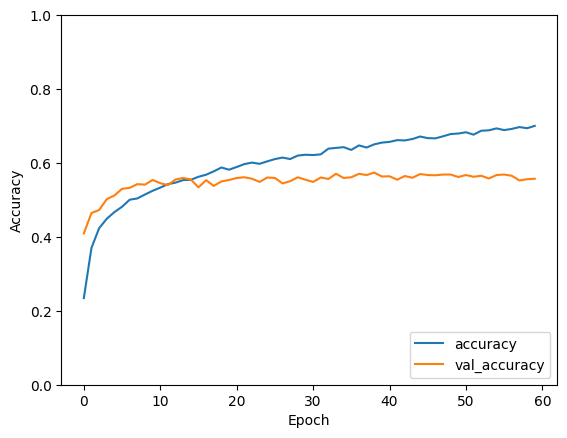

In [54]:
mycnn_16_test_loss,mycnn_16_test_acc = evaluation(MyCNN_16,'MyCNN optimized test set')
mycnn_16_val_loss,mycnn_16_val_acc = evaluation_val(MyCNN_16,'MyCNN optimized validation')
acc_plot(history_MyCNN_vgg16, MyCNN_16)

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 1s 11ms/step - loss: 2.1491 - accuracy: 0.5855
Accuracy:  0.5855000019073486  Loss:  2.1491498947143555
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 0s 10ms/step - loss: 2.2205 - accuracy: 0.5753
Accuracy:  0.5753333568572998  Loss:  2.2204864025115967
63/63 - 1s - loss: 2.1491 - accuracy: 0.5855 - 590ms/epoch - 9ms/step


(2.1491498947143555, 0.5855000019073486)

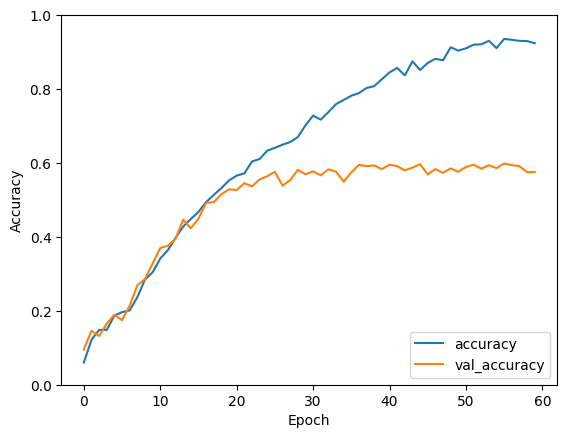

In [55]:
mycnn_16_2_test_loss,mycnn_16_2_test_acc = evaluation(MyCNN_16_2,'MyCNN optimized test set')
mycnn_16_2_val_loss,mycnn_16_2_val_acc = evaluation_val(MyCNN_16_2,'MyCNN optimized validation')
acc_plot(history_MyCNN_vgg16_2, MyCNN_16_2)

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 1s 11ms/step - loss: 2.9960 - accuracy: 0.0500
Accuracy:  0.05000000074505806  Loss:  2.996018171310425
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 1s 10ms/step - loss: 2.9995 - accuracy: 0.0380
Accuracy:  0.03799999877810478  Loss:  2.9994699954986572
63/63 - 1s - loss: 2.9960 - accuracy: 0.0500 - 522ms/epoch - 8ms/step


(2.996018171310425, 0.05000000074505806)

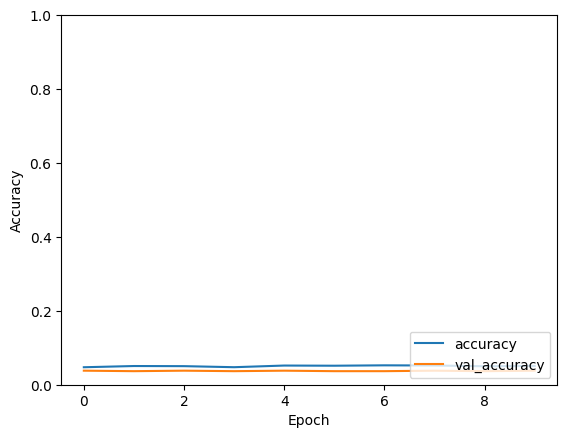

In [93]:
mycnn_eff_test_loss,mycnn_eff_test_acc = evaluation(MyCNN_effn,'MyCNN optimized test set')
mycnn_eff_val_loss,mycnn_eff_val_acc = evaluation_val(MyCNN_effn,'MyCNN optimized validation')
acc_plot(history_MyCNN_eff, MyCNN_effn)

--------------------------------------
MyCNN optimized test set
63/63 [==============================] - 1s 16ms/step - loss: 3.6408 - accuracy: 0.0795
Accuracy:  0.0794999971985817  Loss:  3.6407663822174072
--------------------------------------
MyCNN optimized validation
47/47 [==============================] - 1s 12ms/step - loss: 3.6873 - accuracy: 0.0813
Accuracy:  0.08133333176374435  Loss:  3.687251567840576
63/63 - 1s - loss: 3.6408 - accuracy: 0.0795 - 528ms/epoch - 8ms/step


(3.6407663822174072, 0.0794999971985817)

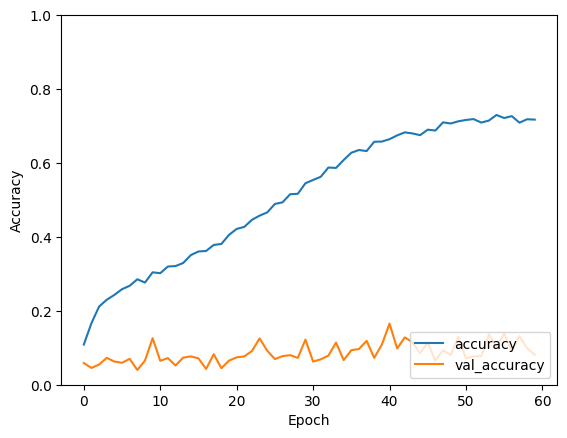

In [59]:
mycnn_eff_2_test_loss,mycnn_eff_2_test_acc = evaluation(MyCNN_effn_2,'MyCNN optimized test set')
mycnn_ef_2_val_loss,mycnn_eff_2_val_acc = evaluation_val(MyCNN_effn_2,'MyCNN optimized validation')
acc_plot(history_MyCNN_effn_2, MyCNN_effn_2)

## Σχόλια

Παίρνωντας ενα pretrained μοντέλο μπορούμε να αξιοποιήσουμε την εκπαίδευσή τους και να το προσαρμόσουμε στις ανάγκες του προβλήματος μας. Παρατηρήσαμε οτι το vgg χωρίς επανεκπαίδευση πετυχαίνει αρκετά καλό accuracy, αν και δεν ξεπερνάει τις μετρικές του μοντέλο μας. Με επανεκπαίδευση πετυχαίνει πολύ καλό train accuracy αλλα παρόμοιο validation accuracy. Αντίθετα το EfficientNet χωρίς επανεκπαίδευση δεν τα καταφέρνει καλά στο συγκεκριμένο πρόβλημά. Ακόμα και αν με επανεκπαίδευση πετυχαίνει καλό train accuracy το validation accuracy συνεχίζει να είναι χαμηλό μαρτυρώντας πρόβλημα υπερεκπαίδευσης

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
